In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("ETHUSD.csv",index_col=[0],parse_dates=[0])

In [32]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [33]:
projection = 10

In [34]:
df['Prediction'] = df['Close'].shift(-projection)

In [35]:
df.tail(15)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2023-06-04,1892.398193,1912.205688,1885.651855,1890.513550,3747042696,1650.519287
2023-06-05,1890.417603,1890.640503,1780.211548,1811.828369,9246593033,1665.519775
2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,8704411776,1716.668823
2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,7919894455,1727.204102
2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,4536041931,1720.577515
2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,4610831509,NaN
2023-06-10,1840.391968,1844.785645,1721.443115,1752.384766,10788500406,NaN
2023-06-11,1752.527588,1776.847168,1741.110474,1753.415283,4559112981,NaN
2023-06-12,1753.075439,1757.659790,1722.906372,1742.528687,6031384958,NaN


In [36]:
x = np.array(df['Close'])

In [37]:
x = x[:-projection]

In [38]:
y = np.array(df['Prediction'])
y = y[:-projection]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [40]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [41]:
x_train

array([[ 704.5960083 ],
       [2972.48510742],
       [ 227.18099976],
       ...,
       [ 243.01596069],
       [ 428.5880127 ],
       [1118.31005859]])

In [42]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [43]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
y_pred = xg_reg.predict(x_test)

In [46]:
y_pred

array([ 223.38031, 1539.4923 , 1928.13   ,  142.57686,  483.77   ,
        379.51196,  603.9593 ,  165.93047, 1083.1217 ,  262.83173,
       1063.5061 , 1831.9398 ,  186.29509,  150.64319,  203.54352,
        622.6737 , 2677.2144 , 1269.0748 ,  245.33406,  248.43906,
       2023.4779 , 4224.8013 , 1373.7678 ,  147.99826,  408.7203 ,
        147.99826, 1596.718  , 1691.9564 , 1709.4934 , 1262.1532 ,
       3033.3948 , 1629.0363 , 2294.6365 , 2120.9104 ,  376.465  ,
        262.98572, 1676.413  ,  147.99826,  272.1651 ,  471.68634,
       2852.3176 ,  783.6215 ,  477.48242, 1363.6697 ,  142.57686,
       2531.006  ,  570.27734,  215.60123,  282.99652,  142.32236,
       2730.353  , 3330.6812 , 4267.746  , 1169.453  , 3433.0076 ,
        206.46985, 1638.8157 ,  723.48517, 3166.5308 ,  142.57686,
        248.43906, 1824.1699 , 3105.062  ,  723.48517,  262.98572,
        235.06386, 1730.1283 , 3105.062  , 2317.0986 ,  376.465  ,
        116.02589,  272.1651 , 3226.8225 ,  182.08969,  245.33

In [47]:
xg_reg.score(x_train,y_train)

0.99209191283861

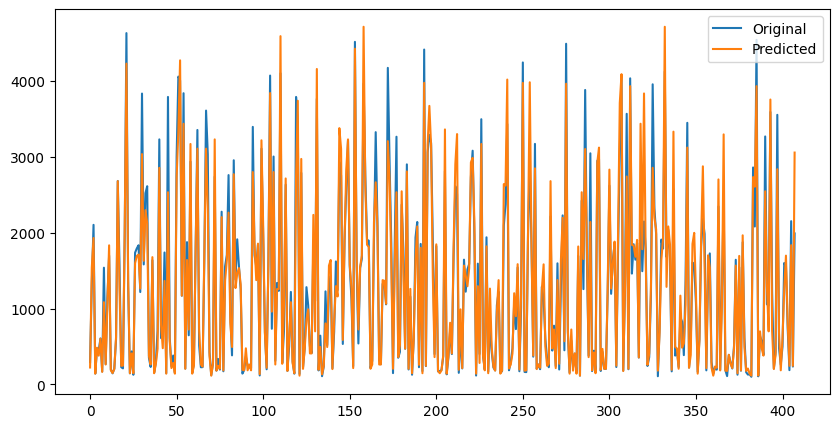

In [48]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label="Original")
plt.plot(y_pred,label="Predicted")
plt.legend(fontsize = 10)
plt.show()